In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Dependencies**

In [29]:
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import svm

import os
import cv2
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

### **Read the Input (Images)**

In [30]:
Directory = r"/content/drive/MyDrive/PRML_mini_Project"
Categories_ = ["Mask","No-Mask"]
Categories = [1,0]

In [31]:
Img_data = []
Img_label = []

for cate_n in Categories_:
    path = os.path.join(Directory, cate_n)
    for Img_i in os.listdir(path):
    	Img_pth = os.path.join(path, Img_i)
    	Img_n = load_img(Img_pth, target_size=(224, 224))
    	Img_n = img_to_array(Img_n)
    	Img_n = preprocess_input(Img_n)
    	Img_data.append(Img_n)
    	Img_label.append(cate_n)

In [32]:
Img_data=np.array(Img_data)

- **Shape of Image array**

In [33]:
print(Img_data.shape)

(2000, 224, 224, 3)


In [34]:
Img_label[500]

'Mask'

In [35]:
Img_label[1500]

'No-Mask'

In [36]:
Img_Face_data = Img_data
#print(Img_Face_data.shape)

In [37]:
Img_label_name = {1 : "Mask", 0 : "No-Mask"}

- **Labeling ( 1 for Mask & 0 for No-Mask )**

In [38]:
Img_label = np.ones((Img_Face_data.shape[0],1))

In [39]:
Img_label[1000:,:] = 0.0

In [40]:
Img_label[500]

array([1.])

In [41]:
Img_label[1500]

array([0.])

### **Extracting only Face Image from Whole Pictures.**


*   **Viola-Jones** Face Detection Technique(also known as **Haar Cascades**)



In [42]:
data_set = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
fnt = cv2.FONT_HERSHEY_COMPLEX

- Split the data into Train and Test (50:50)

In [43]:
x_ntrain, x_ntest, y_ntrain, y_ntest = tts(Img_Face_data, Img_label, test_size = 0.5,random_state=32)

In [44]:
print(x_ntrain.shape)

(1000, 224, 224, 3)


In [45]:
print(x_ntest.shape)

(1000, 224, 224, 3)


In [46]:
x_ntrain = x_ntrain.reshape(x_ntrain.shape[0],x_ntrain.shape[1]*x_ntrain.shape[2]*x_ntrain.shape[3])
x_ntest = x_ntest.reshape(x_ntest.shape[0],x_ntest.shape[1]*x_ntest.shape[2]*x_ntest.shape[3])

### **Classifier**

1.   DecisionTreeClassifier
2.   RandomForestClassifier
3.   LogisticRegression
4.   SVC



In [47]:
FMD_clf = [DecisionTreeClassifier(), 
              RandomForestClassifier(n_estimators=1000, random_state=42),
              LogisticRegression(),
              svm.SVC()]
FMD_cls_name = []

**Classification Report of All 4 Models**

In [48]:
tmp = 0
fmd_accu = []
for n_clf in FMD_clf :
    n_model = n_clf.fit(x_ntrain,y_ntrain.flatten())
    fmd_labl_predicted = n_model.predict(x_ntest)
    n_cnt = accuracy_score(y_ntest, fmd_labl_predicted)
    n_cnt = round(n_cnt*100,2)
    fmd_accu.append(n_cnt)
    FMD_cls_name.append(n_clf.__class__.__name__)
    print (f'{FMD_cls_name[tmp]}  Accuracy Score : {n_cnt}')
    print(classification_report(y_ntest,fmd_labl_predicted))
    print('-'*60)
    tmp = tmp+1

DecisionTreeClassifier  Accuracy Score : 88.3
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89       510
         1.0       0.89      0.87      0.88       490

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000

------------------------------------------------------------
RandomForestClassifier  Accuracy Score : 94.4
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94       510
         1.0       0.93      0.96      0.94       490

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000

------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression  Accuracy Score : 88.5
              precision    recall  f1-score   support

         0.0       0.82      0.99      0.90       510
         1.0       0.99      0.77      0.87       490

    accuracy                           0.89      1000
   macro avg       0.90      0.88      0.88      1000
weighted avg       0.90      0.89      0.88      1000

------------------------------------------------------------
SVC  Accuracy Score : 97.8
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       510
         1.0       0.98      0.98      0.98       490

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

------------------------------------------------------------


**Plot of Accuracy by all four Models (without PCA)**

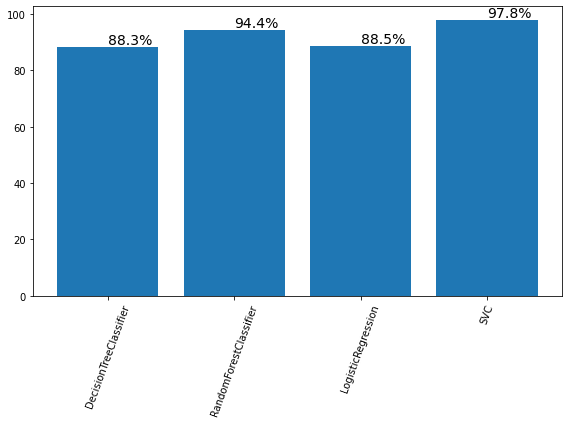

In [49]:
plt.figure(figsize=(8,6))
plt.bar(FMD_cls_name, fmd_accu)
plt.xticks(rotation=70)
for Idx,Val in enumerate(fmd_accu):
    plt.text(x=Idx , y=Val+1 , s=f"{Val}%" , fontdict=dict(fontsize=14))
plt.tight_layout()
plt.show()

# **Feature selction**

**PCA Technique**

In [50]:
from sklearn.decomposition import PCA

In [51]:
fmd_comp = PCA(n_components=3)

In [52]:
x_ntrain = fmd_comp.fit_transform(x_ntrain)
x_ntest = fmd_comp.fit_transform(x_ntest)


In [59]:
FMD_clf = [DecisionTreeClassifier(), 
              RandomForestClassifier(n_estimators=1000, random_state=42),
              LogisticRegression(),
              svm.SVC()]
FMD_cls_name = []

**Classification Report of All 4 Models (After PCA)**

In [60]:
tmp = 0
fmd_accu2 = []
for n_clf in FMD_clf :
    fmd_mdl = n_clf.fit(x_ntrain,y_ntrain.flatten())
    fmd_labl_predicted = fmd_mdl.predict(x_ntest)
    n_cnt = accuracy_score(y_ntest, fmd_labl_predicted)
    n_cnt = round(n_cnt*100,2)
    fmd_accu2.append(n_cnt)
    FMD_cls_name.append(n_clf.__class__.__name__)
    print (f'{FMD_cls_name[tmp]}  Accuracy Score : {n_cnt}')
    print (classification_report(y_ntest,fmd_labl_predicted))
    print('-'*60)
    tmp = tmp+1


DecisionTreeClassifier  Accuracy Score : 82.0
              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82       510
         1.0       0.80      0.84      0.82       490

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000

------------------------------------------------------------
RandomForestClassifier  Accuracy Score : 85.5
              precision    recall  f1-score   support

         0.0       0.87      0.84      0.86       510
         1.0       0.84      0.87      0.85       490

    accuracy                           0.85      1000
   macro avg       0.86      0.86      0.85      1000
weighted avg       0.86      0.85      0.86      1000

------------------------------------------------------------
LogisticRegression  Accuracy Score : 86.9
              precision    recall  f1-score   support

         0.0       0.87      0.87  

**Plot of Accuracy by all four Models (with PCA)**

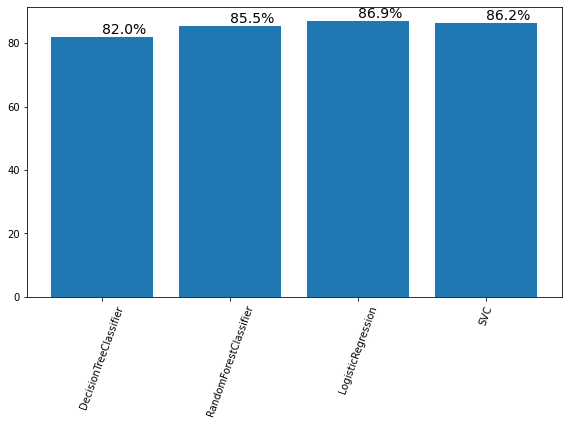

In [63]:
plt.figure(figsize=(8,6))
plt.bar(FMD_cls_name, fmd_accu2)
plt.xticks(rotation=70)
for Idx,Val in enumerate(fmd_accu2):
    plt.text(x=Idx , y =Val+1 , s=f"{Val}%" , fontdict=dict(fontsize=14))
plt.tight_layout()
plt.show()

### **Comparision between After PCA and Before PCA Model**

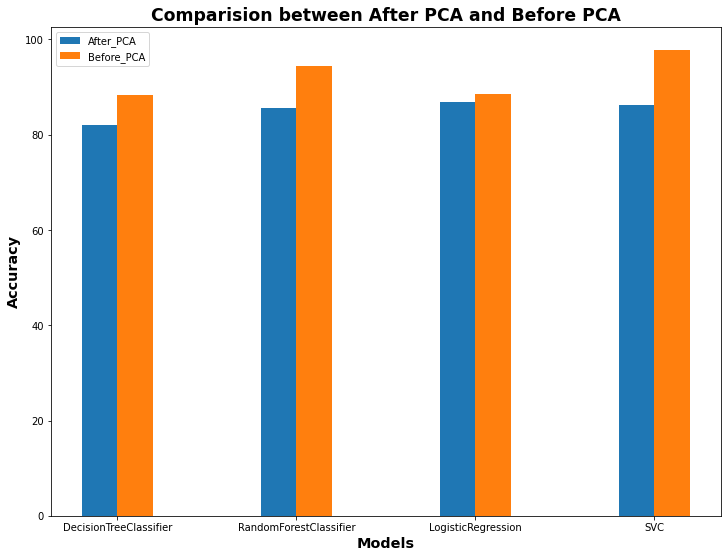

In [64]:
plt.figure(figsize=(12,9))
X = FMD_cls_name
  
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.1, fmd_accu2,0.2,label = 'After_PCA')
plt.bar(X_axis + 0.1, fmd_accu,0.2,label = 'Before_PCA')

plt.xticks(X_axis,FMD_cls_name)
plt.xlabel("Models",weight='bold',fontsize='x-large')
plt.ylabel("Accuracy",weight='bold',fontsize='x-large')
plt.title("Comparision between After PCA and Before PCA",weight='bold',fontsize='xx-large')
plt.legend()
plt.show()